In [4]:
import torch
import matplotlib.pyplot as plt
import torch_dct as dct
from lib.tools import *

In [2]:
tensor1 = torch.load("../experiments_football/tensors/tensor_l2_10.pt")
tensor1 = tensor1[0]
tensor_shape = tensor1.shape[0]* tensor1.shape[1]*tensor1.shape[2]

In [ ]:
calculate_cp_rank(tensor1.numpy())

In [3]:
calculate_cp_rank_fast(tensor1.numpy(),max_rank=10)

Testing rank: 10
Testing rank: 10


10

In [176]:
tensor2 = torch.load("../experiments_football/tensors/tensor_l4_11.pt")
tensor2 = tensor2[0]


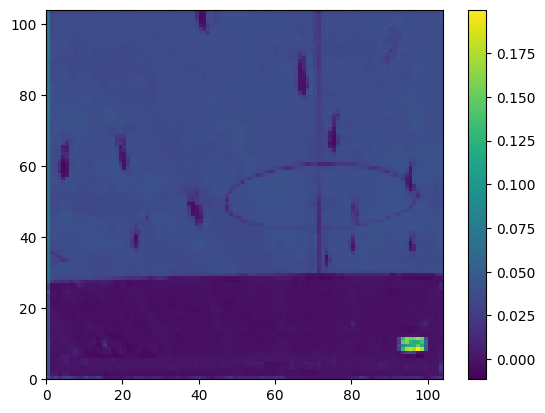

In [177]:
plt.figure()
plt.pcolormesh(tensor1[0,:,:])
plt.colorbar()

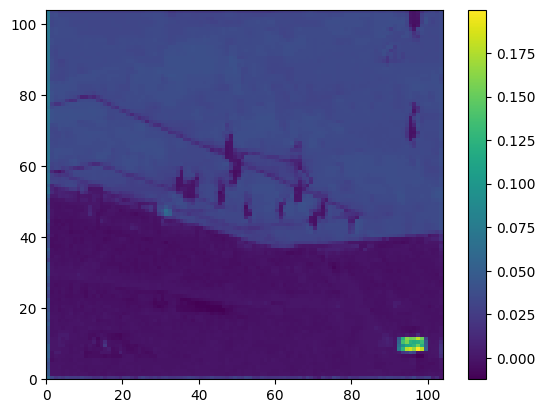

In [178]:
plt.figure()
plt.pcolormesh(tensor2[0,:,:])
plt.colorbar()

In [179]:
tensor_diff = abs(tensor2 -tensor1)
# tensor_diff = tensor_diff * (tensor_diff>0.01)

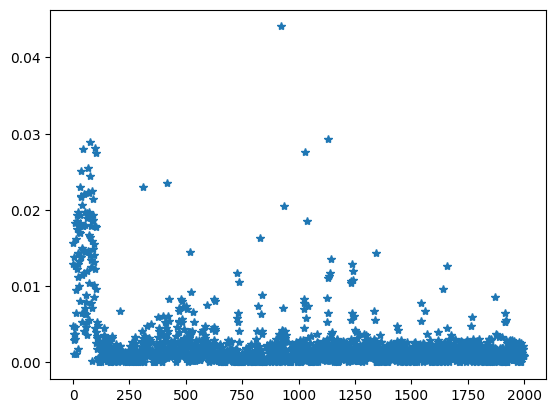

In [180]:
plt.figure()
plt.plot(tensor_diff.reshape(tensor_diff.numel())[0:2000],"*")

In [181]:
rank = calculate_cp_rank(tensor_diff.numpy(),max_rank=10)
print("Tensor rank equals to:", rank)

Testing rank: 1
Error:0.0001492346
Tensor rank equals to: 1


In [182]:
def get_probability_tensor(tensor):
    normalize_base =torch.abs(tensor).max()
    quantized_tensor = torch.floor(((tensor / normalize_base +1)/2)*255 )

    unique_values, counts = torch.unique(quantized_tensor, return_counts=True)
    probabilities = counts.float() / quantized_tensor.numel()  # Probability of each unique value

    # Step 5: Create a mapping of quantized values to probabilities
    value_to_prob = {val.item(): prob.item() for val, prob in zip(unique_values, probabilities)}

    # Step 6: Map the probabilities back to the quantized tensor
    probability_tensor = quantized_tensor.clone()
    for val in unique_values:
        probability_tensor[quantized_tensor == val] = value_to_prob[val.item()]
    return probability_tensor

In [183]:
dct_tensor2 = dct.dct_3d(tensor_diff)
print(torch.mean(torch.special.entr(get_probability_tensor(dct_tensor2))))

tensor(0.0061)


In [184]:
fft_tensor2 = torch.fft.fft(tensor_diff[tensor_diff!=0])
print(torch.mean(torch.special.entr(get_probability_tensor(abs(fft_tensor2)))))

tensor(0.0578)


In [5]:
import random

In [6]:
values= torch.ones(200)
for i in range(200):
    values[i]= random.gauss(1, 0.3)

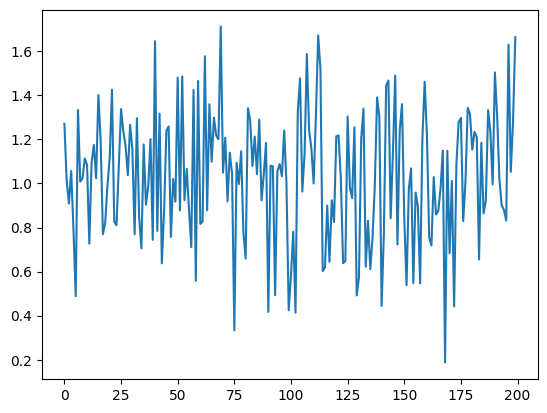

In [7]:
plt.figure()
plt.plot(values)

In [15]:
dct_value = torch.fft.fft(values)

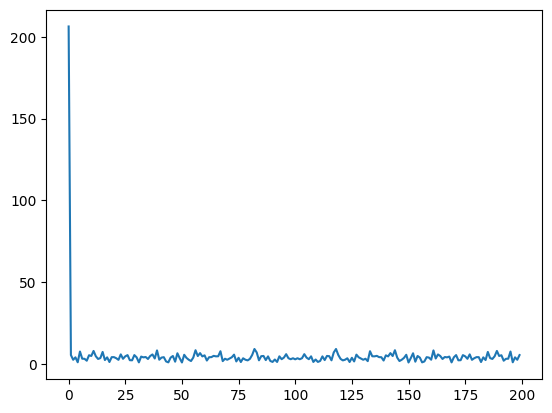

In [16]:
plt.figure()
plt.plot(abs(dct_value))